Были импортированы следующие библиотеки: pandas для работы с датасетами, numpy для реализации массивов, matplotlib для построения графиков, элементы из sklearn для работы с моделями. Были созданы 2 массива x1 и y с данными для прогнозирования. Целевым признаком выступает y, а побочным x1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x1 = np.array([3, 3, 6, 6, 7, 8, 9]);
y = np.array([23.7, 24.8, 25.8, 27.9, 26.9, 25.2, 26.6]);

Была создана модель линейной регрессии с помощью импортированного ранее метода LinearRegression(). Использовались датафреймы X и Y, основанные на первичных данных, для обучения модели методом fit()

In [4]:
model = LinearRegression();

X = pd.DataFrame(x1);
Y = pd.DataFrame(y);

model.fit(X, Y)

LinearRegression()

Модель была успешно обучена. Был реализован метод predict(), который прогнозирует значения y на базе информации из x1 и обученной модели. Метод ravel() приводит массив с результатами к одномерному виду

In [6]:
y_pred = model.predict(X).ravel();

y_pred

array([24.75535714, 24.75535714, 25.84285714, 25.84285714, 26.20535714,
       26.56785714, 26.93035714])

Был создан и выведен датафрейм с истинными и предсказанными значениями, Actual и Predicted соответственно

In [8]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred});

df

,Actual,Predicted
0,23.7,24.755357
1,24.8,24.755357
2,25.8,25.842857
3,27.9,25.842857
4,26.9,26.205357
5,25.2,26.567857
6,26.6,26.930357


Заметно, что предсказания ориентировочно совпадают с первичными данными


Были использованы методы расчета метрик из sklear, а точнее объект класса metrics.  Рассчитывались средняя абсолютная ошибка, среднеквадратическая ошибка, корень из среднеквадратической ошибки и коэффициент детерминации. Были выведены результаты 

In [11]:
MAE_liner = metrics.mean_absolute_error(y, y_pred);
MSE_liner = metrics.mean_squared_error(y, y_pred);
RMSE_liner = np.sqrt(MSE_liner);
R2_liner = metrics.r2_score(y, y_pred);

print('Mean Absolute Error:', MAE_liner)
print('Mean Squared Error:', MSE_liner)
print('Root Mean Squared Error:', RMSE_liner)
print('R2 metric:', R2_liner)

Mean Absolute Error: 0.798979591836733
Mean Squared Error: 1.1160204081632628
Root Mean Squared Error: 1.0564186708702488
R2 metric: 0.3499167855444616


Малые значения ошибок объясняются небольшим объемом данных для прогнозирования. В свою очередь, низкий коэффициент детерминации обусловлен малым количеством информации для обучения 

Для вывода коэффициентов a и b использовались методы из sklear, а именно coef_ и intercept_ соответственно

In [14]:
a = model.coef_;
b = model.intercept_;

a, b

(array([[0.3625]]), array([23.66785714]))

Была произведена визуализация результатов, реализация точек начальных данных с использованием scatter() и линии регрессии с помощью plot()

Text(0, 0.5, 'Predictions')

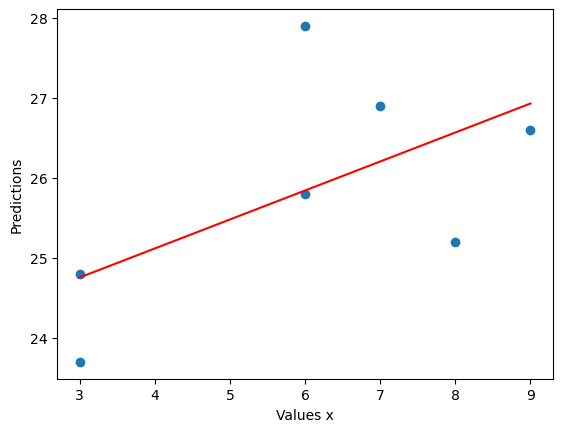

In [16]:
plt.scatter(x1, y);
plt.plot(x1, y_pred, 'r');
plt.xlabel('Values x')
plt.ylabel('Predictions')

На графике заметны пересечения верных значений и динамика прогнозируемых 

Был создан график с отношением предсказанных значений к линии верных с помощью scatter() и plot() соответственно, были добавлены пояснения условных обозначений методом legend()

Text(0, 0.5, 'True values')

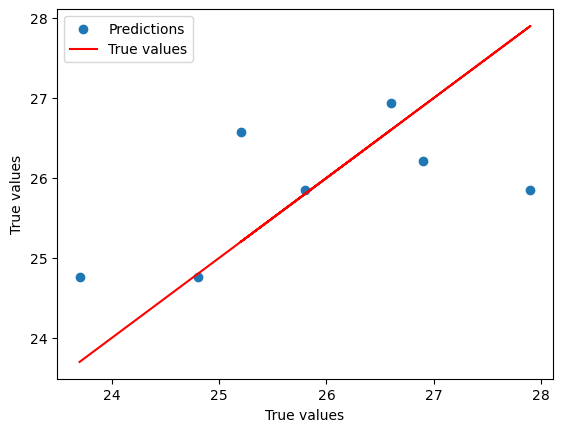

In [19]:
plt.scatter(y, y_pred);
plt.plot(y, y, 'r',);

plt.legend(('Predictions', 'True values'));
plt.xlabel('Values y')
plt.xlabel('Values y')

Был импортирован метод PolynomialFeatures для реализации модели полиномиальной регрессии. Инициализированы массивы x и y с данными для обучения и проверки модели. Степень полинома была установлена на 2 

In [21]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([0, 1, 2, 3, 4, 5, 6]);
y = np.array([15.5, 25.4, 36.4, 39.9, 43.3, 38.8, 49.1]);
poly = PolynomialFeatures(degree=2);

Особенностью полиномиальной модели является трансформация побочного признака методом poly.fit_transform(). Метод преобразует X в массив, содержащий результат возведения в степень исходных данных. Количество значений зависит от указанного параметра degree

In [23]:
model_poly = LinearRegression();

X = pd.DataFrame(x);
Y = pd.DataFrame(y);
X_poly = poly.fit_transform(X);

model_poly.fit(X_poly, Y)

LinearRegression()

После обучения полиномиальной модели были сделаны и выведены следующие предсказания величины y аналогичным образом

In [25]:
y_poly_pred = model_poly.predict(X_poly).ravel();

y_poly_pred

array([16.56904762, 25.87857143, 33.38571429, 39.09047619, 42.99285714,
       45.09285714, 45.39047619])

Были рассчитаны ранее используемые метрики 

In [27]:
MAE_poly = metrics.mean_absolute_error(y, y_poly_pred);
MSE_poly = metrics.mean_squared_error(y, y_poly_pred);
RMSE_poly = np.sqrt(MSE_poly);
R2_poly = metrics.r2_score(y, y_poly_pred);

print('Mean Absolute Error:', MAE_poly)
print('Mean Squared Error:', MSE_poly)
print('Root Mean Squared Error:', RMSE_poly)
print('R2 metric:', R2_poly)

Mean Absolute Error: 2.2401360544217686
Mean Squared Error: 9.224013605442192
Root Mean Squared Error: 3.037106123506749
R2 metric: 0.9171001403745602


Была произведена визуализация полиномиальной регрессии. На графике указаны точки по первичным значениям и регрессионная линия

Text(0, 0.5, 'Predictions')

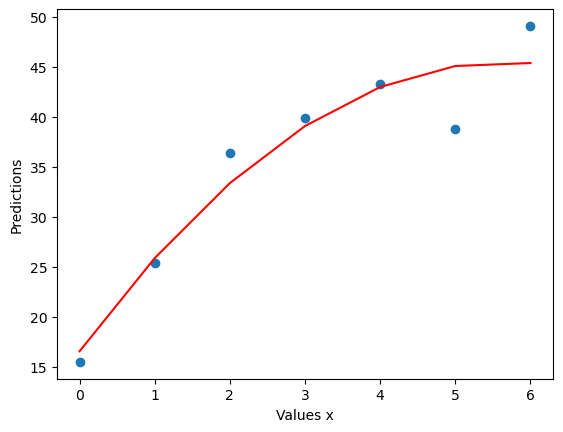

In [29]:
plt.scatter(x, y);
plt.plot(x, y_poly_pred, 'r');
plt.xlabel('Values x')
plt.ylabel('Predictions')

Можно заметить изменения линии регрессии. Она стала более точно описывать закономерность распределения значений

Аналогичным образом была обучена ещё одна полиномиальная модель с разницей в степени полинома, на этот раз равной 3. Производилось прогнозирование значений и визуализация результатов

Text(0, 0.5, 'Predictions')

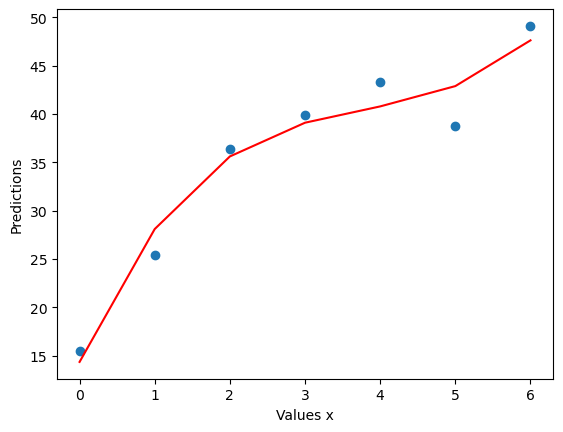

In [32]:
poly1 = PolynomialFeatures(degree=3);
model_poly1 = LinearRegression();

X_poly1 = poly1.fit_transform(X);

model_poly1.fit(X_poly1, Y);

y_poly1_pred = model_poly1.predict(X_poly1).ravel();

plt.scatter(x, y);
plt.plot(x, y_poly1_pred, 'r');
plt.xlabel('Values x')
plt.ylabel('Predictions')

Полиномиальная модель отличается от линейной тем, что способна моделировать нелинейные зависимости. Линейная регрессия описывает данные с помощью прямой линии, тогда как полиномиальная добавляет степени признаков, что позволяет описывать кривые зависимости. В данном случае регрессионная линия более точно отобразила закономерность между точками исходных значений. Параметр степени полинома определяет сложность модели: при низкой степени модель приближает простые кривые, а высокая степень позволяет описывать сложные зависимости, но может привести к переобучению, когда модель слишком точно подстраивается под шум. Оптимальный выбор степени важен для обеспечения баланса между точностью и обобщающей способностью модели

Методом pandas был импортирован набор данных car_price.csv, содержащий подробную информацию о различных характеристиках конкретных автомобилей и установленной на них цены

In [35]:
df = pd.read_csv('car_price.csv');
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Была проанализирована информация по car_price.csv в методических указаниях и строчки с данными об автомобилях в среде. В первую очередь был определен целевой признак, а именно цена (price). Этот признак был выбран, так как стоимость автомобиля складывается в зависимости от всех остальных его характеристик, особенно выделенных в рамках приведенной БД

По значениям цены был построен boxplot с использованием методов boxplot() для реализации графика, title(), xlabel() для заголовков и grid() для настройки сетки

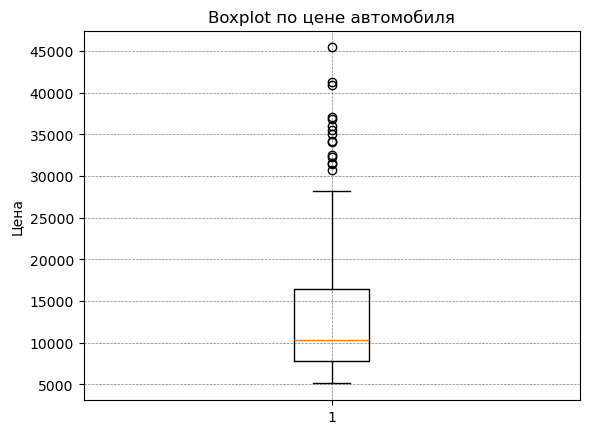

In [38]:
plt.boxplot(df['price']);

plt.title('Boxplot по цене автомобиля');
plt.ylabel('Цена');
plt.grid(True, color='gray', linestyle='--', linewidth=0.5);

На графике заметны выскакивающие значения. Они были удалены с помощью ограничения верхнего порога значений по столбцу price до 30k

In [40]:
upper_fence = 30000;
df = df[(df['price'] <= upper_fence)];

Далее по значениям стоимости автомобиля была построена гистограмма с использованием аналогичных методов и hist()

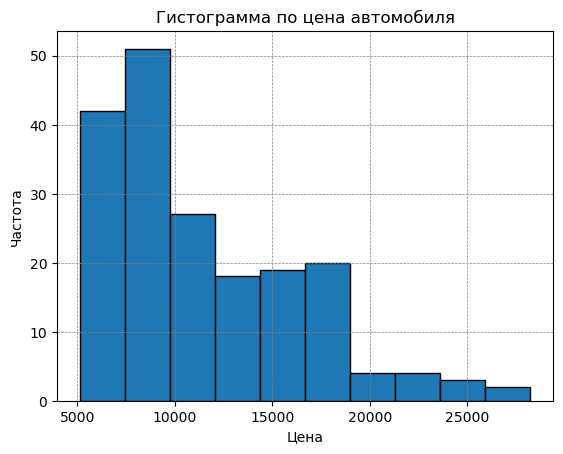

In [42]:
plt.hist(df['price'], edgecolor='black');

plt.title('Гистограмма по цена автомобиля');
plt.xlabel('Цена');
plt.ylabel('Частота');
plt.grid(True, color='gray', linestyle='--', linewidth=0.5);

Для обучения регрессионной модели требуется выделить побочные признаки. Сразу отбросим категориальные величины. Обратим внимание на числовые признаки набора данных. Оценим размах величин по max и min по значениям в выводе метода describe()

In [44]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,105.463158,0.836842,98.276316,172.811579,65.635263,53.755263,2480.031579,118.415789,3.303579,3.251263,10.183789,97.231579,5124.473684,25.947368,31.521053,11509.400879
std,59.925052,1.230009,5.280965,11.375806,1.844961,2.425645,445.890595,26.854315,0.261671,0.304045,4.015859,30.225940,471.593591,6.212921,6.476419,4968.444389
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,54.250000,0.000000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.127500,8.700000,70.000000,4800.000000,21.000000,26.000000,7701.250000
50%,106.500000,1.000000,96.500000,172.500000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,25.000000,31.000000,9959.500000
75%,157.750000,2.000000,100.400000,178.350000,66.500000,55.500000,2823.750000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,15197.500000
max,205.000000,3.000000,114.200000,198.900000,71.400000,59.800000,3750.000000,183.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


Следующим шагом отбросим коэффициенты и другие малые значения (symboling, boreratio, stroke	, compressionratio), так как они более обобщены и по своей сути близки скорее к качественным признакам 


Для остальных величин построим матрицу рассеивания в отношении цен на автомобили. Реализуем задуманное с помощью библиотеки seaborn

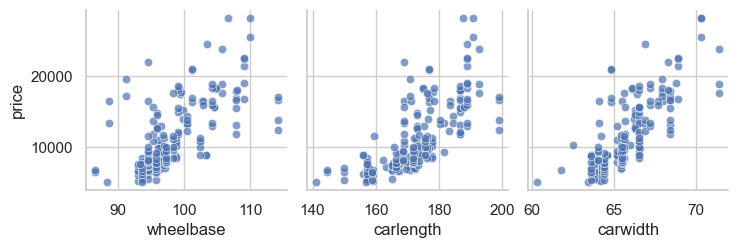

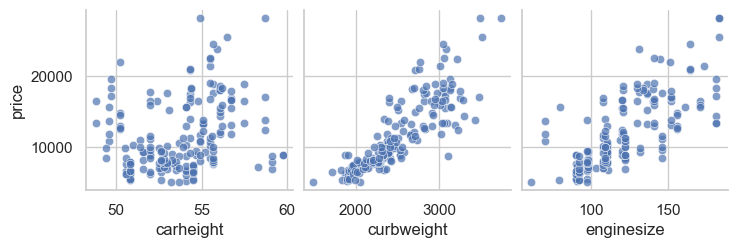

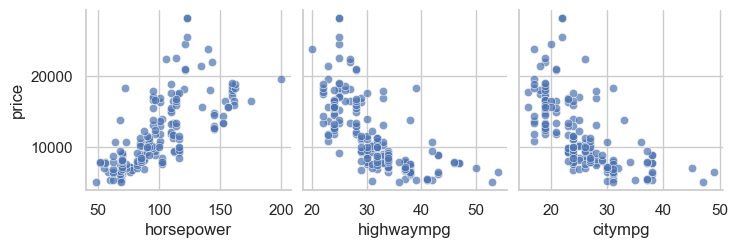

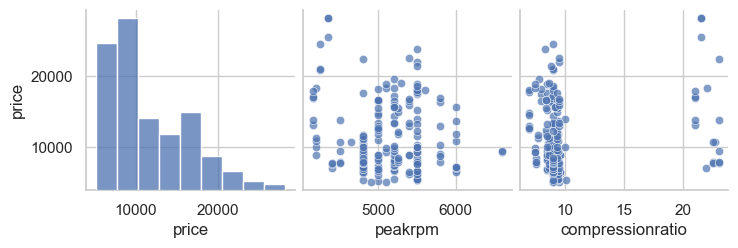

In [47]:
import seaborn as sns

sns.set(style="whitegrid");
sns.pairplot(df, y_vars='price', x_vars=['wheelbase', 'carlength', 'carwidth'], plot_kws={'alpha': 0.7});
sns.pairplot(df, y_vars='price', x_vars=['carheight', 'curbweight', 'enginesize'], plot_kws={'alpha': 0.7});
sns.pairplot(df, y_vars='price', x_vars=['horsepower', 'highwaympg', 'citympg'], plot_kws={'alpha': 0.7});
sns.pairplot(df, y_vars='price', x_vars=['price', 'peakrpm', 'compressionratio'], plot_kws={'alpha': 0.7});

По графикам видно, что наибольшая зависимость между ценой и конкретным признаком наблюдается у следующих величин: wheelbase, carlength, carwidth, curbweight, enginesize, horsepower. Остальные признаки имеют более хаотичную форму значений относительно стоимости, и предположения насчет compressionratio были подтверждены

Для точности умозаключений были проверены значения коэффициентов корреляции между ценой и остальными числовыми признаками. Использовался метод corrwith c параметром numeric_only

In [50]:
df.corrwith(df['price'], numeric_only = True)

car_ID              0.020822
symboling          -0.128941
wheelbase           0.667712
carlength           0.729734
carwidth            0.791890
carheight           0.254564
curbweight          0.853951
enginesize          0.749883
boreratio           0.499244
stroke              0.079378
compressionratio    0.185007
horsepower          0.727394
peakrpm            -0.136189
citympg            -0.670256
highwaympg         -0.686157
price               1.000000
dtype: float64

Ранние предположения были подтверждены, поэтому для обучения модели в качестве побочных признаков были приведены:  wheelbase, carlength, carwidth, curbweight, enginesize, horsepower

Из библиотеки sklearn были импортированы методы StandardScaler для нормализации данных и train_test_split для разбиения данных на обучающую и тестовую выборки. Нужные столбцы для прогнозирования были выбраны и занесены в переменные X и Y. Нормализация применялась к побочным признакам X. Данные были разделены на X_train, X_valid, y_train и y_valid. Для обучения модели использовались X_train и y_train

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']];
Y = df['price'];

sc = StandardScaler();
X_c = sc.fit_transform(X);

X_train, X_valid, y_train, y_valid = train_test_split(X_c, Y,  test_size=0.25, random_state=0);

model = LinearRegression();
model.fit(X_train, y_train)

LinearRegression()

Были сделаны предсказания относительно цены автомобиля. Качество прогнозирования было оценено с помощью средней абсолютной ошибки, среднеквадратической ошибки, корню из среднеквадратической ошибки и коэффициентом детерминации

In [55]:
predictions_valid = model.predict(X_valid);

MAE_liner_m = metrics.mean_absolute_error(y_valid, predictions_valid);
MSE_liner_m = metrics.mean_squared_error(y_valid, predictions_valid);
RMSE_liner_m = np.sqrt(MSE_liner_m);
R2_liner_m = metrics.r2_score(y_valid, predictions_valid);

print('Mean Absolute Error:', MAE_liner_m)
print('Mean Squared Error:', MSE_liner_m)
print('Root Mean Squared Error:', RMSE_liner_m)
print('R2 metric:', R2_liner_m)

Mean Absolute Error: 1737.148385274026
Mean Squared Error: 5294644.878062304
Root Mean Squared Error: 2301.00953454398
R2 metric: 0.813322684880913


Коэффициент детерминации близок к 0, а именно равен 0,81, что говорит о способности модели объяснить большую часть данных. Помимо этого, под другим метрикам заметно малое количество ошибок относительно такого объема данных. Таким образом, показатели созданной модели довольно приемлемы 

Был создан датафрейм из истинных и предсказанных значений, Actual и Predicted. Обновлена индексация. Используя метод head, были выведены несколько строк датафрейма

In [58]:
df_pred = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True);

df_pred.head(10)

,Actual,Predicted
0,7957.0,9551.181721
1,6989.0,10324.449270
2,10898.0,11594.555117
3,18399.0,19465.662837
4,5118.0,7347.215436
5,12629.0,16193.820066
6,5572.0,6503.696471
7,7053.0,8010.404538
8,7898.0,8080.539942
9,18920.0,17358.243314


Ещё один датафрейм был выведен. В нем показываются коэффициенты регрессии a и b в зависимости от побочного признака

In [60]:
df_coef = pd.DataFrame({'Feature': X.columns, 'a': model.coef_, 'b': model.intercept_});

df_coef 

,Feature,a,b
0,wheelbase,343.807520,11629.19879
1,carlength,-799.810175,11629.19879
2,carwidth,1060.088551,11629.19879
3,curbweight,2491.682495,11629.19879
4,enginesize,90.111526,11629.19879
5,horsepower,1426.316336,11629.19879


Был построен аналогичный 1-й части задания график отображающий отношение верных и предсказанных значений. Были обозначены в легенде как Predictions и True values

Text(0, 0.5, 'True values')

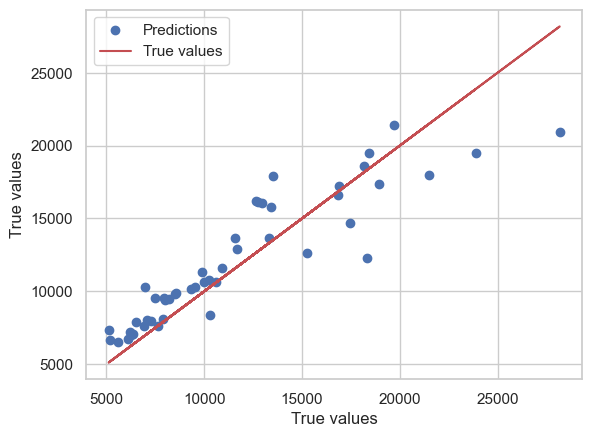

In [62]:
plt.scatter(y_valid, predictions_valid);
plt.plot(y_valid, y_valid, 'r',);

plt.legend(('Predictions', 'True values'));
plt.xlabel('Values y')
plt.xlabel('Values y')

Дополнительно была обучена ещё одна регрессионная модель только в этом случае методом k-ближайших соседей. К-ближайших соседей (K-Nearest Neighbors или просто KNN) — алгоритм классификации и регрессии, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу. Использовался импортированный метод KNeighborsRegressor c параметром n_neighbors=27. Такое значение параметра обусловлено его эффективностью по сравнению с остальными числовыми значениями. При значениях до 27 эффективность модели последовательно увеличивается, а после начинает стремительно падать

In [64]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

model_knn = KNeighborsRegressor(n_neighbors=27)
model_knn .fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=27)

Для сравнения качества нынешней модели в сравнении с предыдущей используются аналогичные метрики оценивания

In [66]:
predictions_valid = model_knn.predict(X_valid);

MAE_knn = metrics.mean_absolute_error(y_valid, predictions_valid);
MSE_knn = metrics.mean_squared_error(y_valid, predictions_valid);
RMSE_knn = np.sqrt(MSE_knn);
R2_knn = metrics.r2_score(y_valid, predictions_valid);

print('Mean Absolute Error:', MAE_knn)
print('Mean Squared Error:', MSE_knn)
print('Root Mean Squared Error:', RMSE_knn)
print('R2 metric:', R2_knn)

Mean Absolute Error: 1817.819362573099
Mean Squared Error: 7083570.60177514
Root Mean Squared Error: 2661.4978117171427
R2 metric: 0.7479427332838215


Была проведена визуализация для более четкого понимания ситуации

Text(0, 0.5, 'True values')

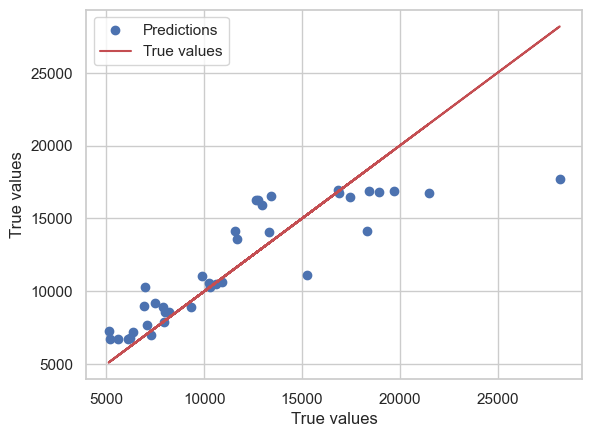

In [68]:
plt.scatter(y_valid, predictions_valid);
plt.plot(y_valid, y_valid, 'r',);

plt.legend(('Predictions', 'True values'));
plt.xlabel('Values y')
plt.xlabel('Values y')

Можно заметить, что новая модель справляется хуже, чем старая. Меньшее качество работы модели k ближайших соседей (knn) по сравнению с линейной регрессией может быть связано с несколькими факторами. Линейная регрессия лучше справляется с линейными зависимостями и менее чувствительна к шуму в данных. Метод knn сильно зависит от параметра k, выбора метрики расстояния и чувствителен к выбросам, что может приводить к переобучению или недообучению. Кроме того, в условиях высокой размерности (проклятие размерности) эффективность knn падает, так как расстояния между точками становятся менее информативными. Также важно масштабирование данных для knn, так как разные масштабы признаков могут исказить результаты.

В ходе работы было изучено отличие между моделями линейной и полиномиальной регрессии, их особенности и применение в задачах анализа данных. Было разобрано, как простая линейная регрессия используется для моделирования линейных зависимостей, тогда как полиномиальная регрессия позволяет описывать сложные, нелинейные отношения между переменными с использованием степенных признаков. Стало понято, что выбор степени полинома играет ключевую роль: низкая степень подходит для простых зависимостей, тогда как высокая степень повышает гибкость модели, но может привести к переобучению. Подчеркнута важность баланса между сложностью модели и её способностью к обобщению, что требует внимательного подбора степени полинома.
Было изучено использование метода k ближайших соседей и его особенности. Осознано, что knn чувствителен к шуму, выбору параметра k и масштабу данных, что делает нормализацию важной для корректной работы. Обнаружено, что метод может уступать линейной регрессии при наличии выраженной линейной зависимости. Изучено понятие "проклятие размерности", которое объясняет снижение эффективности метода knn при работе с высокоразмерными данными.
В рамках работы были освоены построение и анализ различных графиков, включая scatter plot, boxplot и гистограммы, а также построение матриц рассеивания для оценки взаимосвязей между признаками. Стало понято, как улучшать внешний вид графиков, добавлять легенды и настраивать оси для более информативного отображения данных. Было изучено использование методов нормализации и масштабирования для подготовки данных. Изучено, как метод fit_transform() помогает преобразовывать данные для применения в моделях, и как использовать PolynomialFeatures для создания полиномиальных признаков.
Были исследованы способы решения ошибок, возникающих при работе с массивами, включая корректировку форматов данных и правильное использование методов reshape() и .item(). Было изучено, как работать с многомерными массивами и приводить их к нужной форме для дальнейшей обработки.

Индивидуальное задание (Доп. задание 12)

Был импортирован класс RandomForestRegressor из библиотеки sklearn.ensemble. Создан объект модели случайного леса с фиксированным начальным состоянием генератора случайных чисел (random_state=42) и количеством деревьев в лесу (n_estimators=100). Модель была обучена на тренировочных данных с использованием метода fit

In [73]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

На валидационных данных был выполнен прогноз с использованием метода predict, после чего вычислены основные метрики качества модели: средняя абсолютная ошибка (MAE) через metrics.mean_absolute_error, среднеквадратичная ошибка (MSE) с помощью metrics.mean_squared_error, корень из MSE (RMSE) через np.sqrt, а также коэффициент детерминации (R2) с использованием metrics.r2_score. Результаты метрик выведены на экран для оценки работы модели

In [75]:
pred_rf = model_rf.predict(X_valid)

MAE_rf = metrics.mean_absolute_error(y_valid, pred_rf);
MSE_rf = metrics.mean_squared_error(y_valid, pred_rf);
RMSE_rf = np.sqrt(MSE_rf);
R2_rf = metrics.r2_score(y_valid, pred_rf);

print('Mean Absolute Error:', MAE_rf)
print('Mean Squared Error:', MSE_rf)
print('Root Mean Squared Error:', RMSE_rf)
print('R2 metric:', R2_rf)

Mean Absolute Error: 1515.0975407894737
Mean Squared Error: 3940869.821415513
Root Mean Squared Error: 1985.16241688571
R2 metric: 0.8597705971305853


Был создан DataFrame для представления результатов работы различных моделей. В столбец Model были внесены названия обученных моделей, таких как линейная регрессия, полиномиальная регрессия, линейная множественная регрессия, метод k-ближайших соседей и алгоритм случайного леса. Метрики MSE, MAE, RMSE и R2 для каждой модели были добавлены в соответствующие столбцы, используя заранее вычисленные значения. Для формирования таблицы использовался метод pd.DataFrame, который преобразовал данные в удобный для анализа табличный формат. Итоговая таблица предназначена для сравнения моделей по их качеству

In [77]:
model_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Linear Multiple Regression', 'K-Nearest Neighbors', 'Random Forest'],
    'MSE': [MSE_liner, MSE_poly, MSE_liner_m, MSE_knn, MSE_rf],
    'MAE': [MAE_liner, MAE_poly, MAE_liner_m, MAE_knn, MAE_rf],
    'RMSE': [RMSE_liner, RMSE_poly, RMSE_liner_m, RMSE_knn, RMSE_rf],
    'R2': [R2_liner, R2_poly, R2_liner_m, R2_knn, R2_rf]
})

model_metrics

,Model,MSE,MAE,RMSE,R2
0,Linear Regression,1.116020e+00,0.798980,1.056419,0.349917
1,Polynomial Regression,9.224014e+00,2.240136,3.037106,0.917100
2,Linear Multiple Regression,5.294645e+06,1737.148385,2301.009535,0.813323
3,K-Nearest Neighbors,7.083571e+06,1817.819363,2661.497812,0.747943
4,Random Forest,3.940870e+06,1515.097541,1985.162417,0.859771


Результаты сравнения моделей показывают, что Polynomial Regression продемонстрировала наивысшую точность (R² = 0.92) и относительно низкие значения ошибок (MSE = 9.22, MAE = 2.24, RMSE = 3.04). Это свидетельствует о способности метода эффективно описывать данные. Random Forest также показал высокое качество (R² = 0.86) и сбалансированные ошибки (MSE = 3.94e+06, MAE = 1515.10, RMSE = 1985.16), так как он является мощным инструментом для работы с нелинейными зависимостями. Linear Multiple Regression оказалась конкурентоспособной моделью с хорошей точностью (R² = 0.81) и умеренными ошибками, однако она уступает алгоритму случайного леса и полиномиальной регрессии. K-Nearest Neighbors показал более низкое качество (R² = 0.75) и более высокие ошибки, что ограничивает его эффективность. Linear Regression продемонстрировала наихудший результат (R² = 0.35) и высокие ошибки, которые свидетельствуют о её слабой способности описывать вариации данных. Таким образом, полиномиальная регрессия оказалась наиболее точной моделью, а алгоритм случайного леса обеспечил оптимальный баланс между точностью и ошибками